<a href="https://colab.research.google.com/github/nshzk8975/fastai/blob/master/Lesson3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

# **多ラベル分類**

In [0]:
! pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.3)


In [0]:
! mkdirr -p ~/.kaggle/  
! mv kaggle.json ~/.kaggle/ 

/bin/bash: mkdirr: command not found
mv: cannot stat 'kaggle.json': No such file or directory


In [0]:
path = Config.data_path()/'planet'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/planet')

In [0]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

FileNotFoundError: ignored

# **segmentation** 

**データの確認**

In [4]:
path = untar_data(URLs.CAMVID)
path.ls()

[PosixPath('/root/.fastai/data/camvid/valid.txt'),
 PosixPath('/root/.fastai/data/camvid/labels'),
 PosixPath('/root/.fastai/data/camvid/codes.txt'),
 PosixPath('/root/.fastai/data/camvid/images')]

In [0]:
path_lbl = path/'labels'
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/root/.fastai/data/camvid/images/0016E5_08001.png'),
 PosixPath('/root/.fastai/data/camvid/images/0001TP_008940.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_08127.png')]

In [7]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/root/.fastai/data/camvid/labels/0006R0_f03930_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_06960_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0006R0_f03240_P.png')]

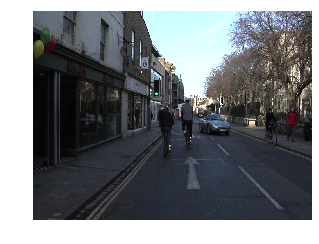

In [15]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

In [0]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [20]:
get_y_fn(fnames[0])

PosixPath('/root/.fastai/data/camvid/labels/0016E5_08001_P.png')

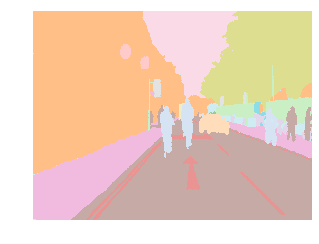

In [21]:
img_lbl = get_y_fn(fnames[0])
img = open_mask(img_lbl)
img.show(figsize=(5,5))

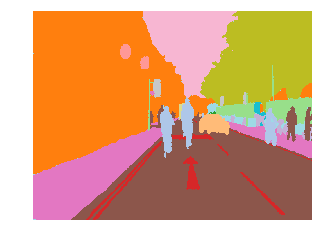

In [28]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [29]:
mask.shape[1:]

torch.Size([720, 960])

In [30]:
mask.shape

torch.Size([1, 720, 960])

In [31]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([720, 960]), tensor([[[ 4,  4,  4,  ..., 26, 26, 26],
          [ 4,  4,  4,  ..., 26, 26, 26],
          [ 4,  4,  4,  ..., 26, 26, 26],
          ...,
          [30, 30, 30,  ..., 17, 17, 17],
          [30, 30, 30,  ..., 17, 17, 17],
          [30, 30, 30,  ..., 17, 17, 17]]]))

In [32]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [33]:
np.loadtxt(path/'valid.txt', dtype=str)

array(['0016E5_07959.png', '0016E5_07961.png', '0016E5_07963.png', '0016E5_07965.png', ..., '0016E5_08153.png',
       '0016E5_08155.png', '0016E5_08157.png', '0016E5_08159.png'], dtype='<U16')

**データセット**